# Pandas Exercícios

Contexto: Iremos simular a realização de uma prova de redação a nível nacional. Sendo assim:

1. Cria um dataframe pandas com 1000 amostras em cada uma das seguintes colunas: <br>
1.1. Idade: números inteiros aleatórios entre 0 e 100 (inclusos). <br>
1.2. Data: datas aleatórias entre 01/01/2000 até 31/01/2000. <br>
1.3. Nota: Números decimais entre 0 e 1000. <br>
1.4. Sexo: Valores aleatórios de M ou F. <br>
1.5: Estado: Valores aleatórios entre os estados do Brasil. <br>

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [65]:
#Seetup
seed = 0
np.random.seed(seed)
amostra = 1000
datas = pd.date_range('2000-01-01', '2000-01-31')
sexo = ['M', 'F']
uf = [
    'AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT',
    'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO',
    'RR', 'SC', 'SP', 'SE', 'TO' 
]

df = pd.DataFrame ({
    'idade': np.random.randint(0, 101, amostra),
    'data': np.random.choice(datas, amostra),
    'nota': np.random.uniform(0, 1000.1, amostra),
    'sexo': np.random.choice(sexo, amostra),
    'uf': np.random.choice(uf, amostra)
})
df.head()

,idade,data,nota,sexo,uf
0,44,2000-01-15,102.456526,F,RR
1,47,2000-01-06,397.065535,F,RS
2,64,2000-01-23,276.677395,M,RR
3,67,2000-01-20,506.393554,F,MT
4,67,2000-01-16,349.932670,F,SP


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   idade   1000 non-null   int64         
 1   data    1000 non-null   datetime64[ns]
 2   nota    1000 non-null   float64       
 3   sexo    1000 non-null   object        
 4   uf      1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 39.2+ KB


2. Utilizando pandas, realize as seguintes alterações no dataset:<br>
2.1. Preencha as notas nulas com valor 0, simulando uma atribuição automática do sistema.<br>
2.2. Preencha as notas nulas com valor 0, simulando uma atribuição automática do sistema.<br>
2.3. Remova alunos com idades inferiores a 18 e superiores a 80, simulando uma filtragem automática do sistema para alunos com idades incosistentes.<br>
2.4. Crie um novo campo de aprovado para os alunos restantes que obtiveram nota igual ou superior a 600. Simulando uma correção automática.<br>
2.5. Crie um campo novo indicando o dia da semana para todas as datas.<br>


In [67]:
# 2.1. Preencha as notas nulas com valor 0, simulando uma atribuição automática do sistema.
ausentes = df.sample(frac=0.2, random_state=seed).index
df.loc[ausentes, 'nota'] = np.nan # ou None
df.tail(10)


,idade,data,nota,sexo,uf
990,26,2000-01-11,NaN,M,RO
991,89,2000-01-07,114.935842,M,SC
992,89,2000-01-29,724.144934,F,PA
993,6,2000-01-13,NaN,F,SC
994,88,2000-01-12,176.121448,F,AL
995,79,2000-01-03,319.839316,F,MS
996,41,2000-01-28,NaN,F,AP
997,17,2000-01-18,539.590559,F,SP
998,80,2000-01-08,45.854940,M,PA
999,43,2000-01-08,NaN,M,ES


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   idade   1000 non-null   int64         
 1   data    1000 non-null   datetime64[ns]
 2   nota    800 non-null    float64       
 3   sexo    1000 non-null   object        
 4   uf      1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 39.2+ KB


In [69]:
#2.2. Preencha as notas nulas com valor 0, simulando uma atribuição automática do sistema.
#df.fillna(0) #substitui os valores nulos por zero
#df.loc[df['nota'].isna(), 'nota'] = 0
df.loc[ausentes, 'nota'] = 0
df.tail(10)

,idade,data,nota,sexo,uf
990,26,2000-01-11,0.000000,M,RO
991,89,2000-01-07,114.935842,M,SC
992,89,2000-01-29,724.144934,F,PA
993,6,2000-01-13,0.000000,F,SC
994,88,2000-01-12,176.121448,F,AL
995,79,2000-01-03,319.839316,F,MS
996,41,2000-01-28,0.000000,F,AP
997,17,2000-01-18,539.590559,F,SP
998,80,2000-01-08,45.854940,M,PA
999,43,2000-01-08,0.000000,M,ES


In [70]:
# 2.3. Remova alunos com idades inferiores a 18 e superiores a 80, simulando uma filtragem automática do sistema para alunos com idades incosistentes.

mask_lt18 = df['idade'] < 18 
mask_gt80 = df['idade'] > 80
mask_wrong_age = mask_lt18 | mask_gt80 # seleciona as pessoas abaixo de 18 e acima de 80
mask_wrong_age

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997     True
998    False
999    False
Name: idade, Length: 1000, dtype: bool

In [71]:
df[mask_wrong_age] # filtro das pessoas abaixo de 18 e acima de 80

,idade,data,nota,sexo,uf
5,9,2000-01-23,0.000000,F,RR
6,83,2000-01-14,24.579482,M,SE
9,87,2000-01-02,268.735900,F,BA
11,88,2000-01-24,955.663951,M,PI
12,88,2000-01-27,316.581865,M,DF
...,...,...,...,...,...
991,89,2000-01-07,114.935842,M,SC
992,89,2000-01-29,724.144934,F,PA
993,6,2000-01-13,0.000000,F,SC
994,88,2000-01-12,176.121448,F,AL


In [72]:
df = df[~mask_wrong_age] #mostra os que estão entre 18 e 80
df

,idade,data,nota,sexo,uf
0,44,2000-01-15,102.456526,F,RR
1,47,2000-01-06,0.000000,F,RS
2,64,2000-01-23,276.677395,M,RR
3,67,2000-01-20,506.393554,F,MT
4,67,2000-01-16,349.932670,F,SP
...,...,...,...,...,...
990,26,2000-01-11,0.000000,M,RO
995,79,2000-01-03,319.839316,F,MS
996,41,2000-01-28,0.000000,F,AP
998,80,2000-01-08,45.854940,M,PA


In [73]:
df[mask_wrong_age]

/var/folders/32/j5chh2bs2p91hdldnvkwbx240000gn/T/ipykernel_23877/2896281325.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[mask_wrong_age]


,idade,data,nota,sexo,uf


In [74]:
#2.4. Crie um novo campo de aprovado para os alunos restantes que obtiveram nota igual ou superior a 600. Simulando uma correção automática.<br>
mask_aprovado = df['nota'] >= 600
df[mask_aprovado]

,idade,data,nota,sexo,uf
7,21,2000-01-12,634.050320,F,RJ
10,70,2000-01-08,800.335629,F,AC
15,65,2000-01-16,634.045051,F,AC
16,39,2000-01-23,751.107403,M,PE
24,72,2000-01-09,798.769118,M,SC
...,...,...,...,...,...
970,51,2000-01-31,754.859372,M,TO
972,59,2000-01-16,667.700565,M,AP
983,65,2000-01-01,989.624035,M,MT
984,23,2000-01-23,644.480006,F,RS


In [75]:
aprovado = lambda x: 'Aprovado' if x>=600 else 'Reprovado'
    

In [76]:
df['nota'].apply(aprovado).value_counts()

nota
Reprovado    421
Aprovado     203
Name: count, dtype: int64

In [77]:
df['Aprovado'] = df['nota'].apply(aprovado)
df

,idade,data,nota,sexo,uf,Aprovado
0,44,2000-01-15,102.456526,F,RR,Reprovado
1,47,2000-01-06,0.000000,F,RS,Reprovado
2,64,2000-01-23,276.677395,M,RR,Reprovado
3,67,2000-01-20,506.393554,F,MT,Reprovado
4,67,2000-01-16,349.932670,F,SP,Reprovado
...,...,...,...,...,...,...
990,26,2000-01-11,0.000000,M,RO,Reprovado
995,79,2000-01-03,319.839316,F,MS,Reprovado
996,41,2000-01-28,0.000000,F,AP,Reprovado
998,80,2000-01-08,45.854940,M,PA,Reprovado


In [78]:
# 2.5. Crie um campo novo indicando o dia da semana para todas as datas.
df['data'].dt.weekday
df.loc[:,'dia_semana'] = df['data'].dt.weekday
df


,idade,data,nota,sexo,uf,Aprovado,dia_semana
0,44,2000-01-15,102.456526,F,RR,Reprovado,5
1,47,2000-01-06,0.000000,F,RS,Reprovado,3
2,64,2000-01-23,276.677395,M,RR,Reprovado,6
3,67,2000-01-20,506.393554,F,MT,Reprovado,3
4,67,2000-01-16,349.932670,F,SP,Reprovado,6
...,...,...,...,...,...,...,...
990,26,2000-01-11,0.000000,M,RO,Reprovado,1
995,79,2000-01-03,319.839316,F,MS,Reprovado,0
996,41,2000-01-28,0.000000,F,AP,Reprovado,4
998,80,2000-01-08,45.854940,M,PA,Reprovado,5


3. Gere um relatório com os seguintes tópicos:<br>
3.1. Tabela cruzada de participantes de cada sexo por estado.<br>
3.2. Gráfico de pizza da quantidade de aprovados por sexo, e um de barras com a quantidade de aprovados por estado.<br>
3.3. Gráfico de pontos de nota por idade, colorindo por sexo.<br>
3.3.1. Gráfico de barras com a participação por dia da semana e por dia do mês.<br>
3.3.2. Gráfico de pontos das notas por dia da semana.<br>


In [83]:
#3.1. Tabela cruzada de participantes de cada sexo por estado.<br>

pd.crosstab(df['uf'], df['sexo'], margins=1)

sexo,F,M,All
uf,,,
AC,12,20,32
AL,14,7,21
AM,9,11,20
AP,9,11,20
BA,7,11,18
CE,13,18,31
DF,12,12,24
ES,16,11,27
GO,13,11,24


In [86]:
#3.2. Gráfico de pizza da quantidade de aprovados por sexo, e um de barras com a quantidade de aprovados por estado.<br>

(df['Aprovado'] == 'Aprovado').value_counts()

Aprovado
False    421
True     203
Name: count, dtype: int64

In [87]:
aprovados = df['Aprovado'] == 'Aprovado'
aprovados

0      False
1      False
2      False
3      False
4      False
       ...  
990    False
995    False
996    False
998    False
999    False
Name: Aprovado, Length: 624, dtype: bool

In [88]:
df[aprovados]

,idade,data,nota,sexo,uf,Aprovado,dia_semana
7,21,2000-01-12,634.050320,F,RJ,Aprovado,2
10,70,2000-01-08,800.335629,F,AC,Aprovado,5
15,65,2000-01-16,634.045051,F,AC,Aprovado,6
16,39,2000-01-23,751.107403,M,PE,Aprovado,6
24,72,2000-01-09,798.769118,M,SC,Aprovado,6
...,...,...,...,...,...,...,...
970,51,2000-01-31,754.859372,M,TO,Aprovado,0
972,59,2000-01-16,667.700565,M,AP,Aprovado,6
983,65,2000-01-01,989.624035,M,MT,Aprovado,5
984,23,2000-01-23,644.480006,F,RS,Aprovado,6


Text(0.5, 1.0, 'Aprovados')

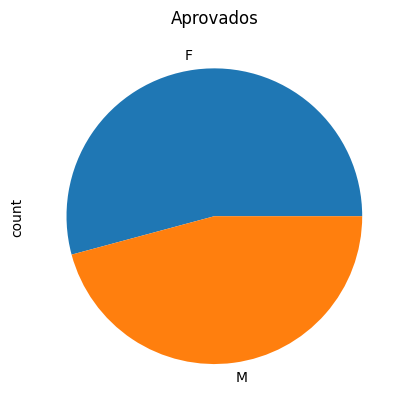

In [94]:
df.loc[aprovados, 'sexo'].value_counts().plot(kind='pie');
plt.title('Aprovados')

Text(0.5, 0, 'quantidade')

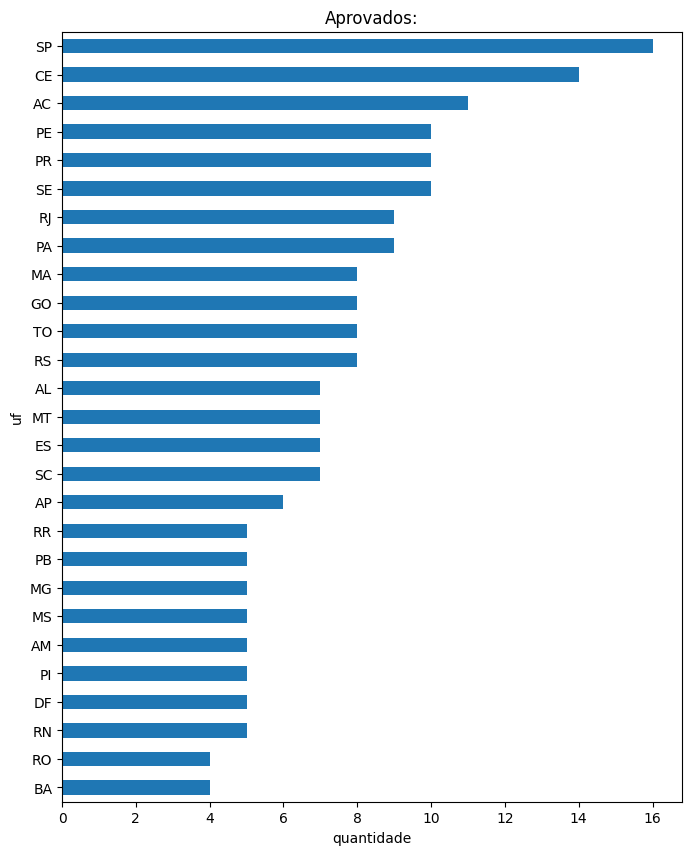

In [104]:
#3.3. Gráfico de pontos de nota por idade, colorindo por sexo.<br>
plt.figure(figsize=[8,10])
df.loc[aprovados, 'uf'].value_counts(ascending=True).plot(kind='barh');
plt.title('Aprovados:')
plt.xlabel('quantidade')

Text(0.5, 1.0, 'Aprovados')

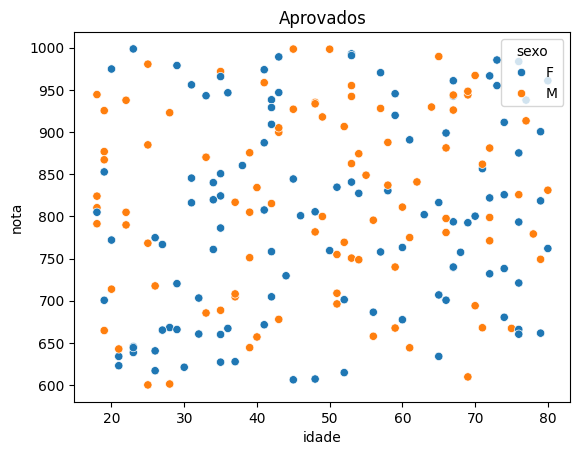

In [107]:
import seaborn as sns
sns.scatterplot(
    data=df[aprovados], 
    x='idade', 
    y='nota', 
    hue='sexo'
);
plt.title('Aprovados')

In [109]:
# 3.3.1. Gráfico de barras com a participação por dia da semana e por dia do mês.<br>

df

,idade,data,nota,sexo,uf,Aprovado,dia_semana
0,44,2000-01-15,102.456526,F,RR,Reprovado,5
1,47,2000-01-06,0.000000,F,RS,Reprovado,3
2,64,2000-01-23,276.677395,M,RR,Reprovado,6
3,67,2000-01-20,506.393554,F,MT,Reprovado,3
4,67,2000-01-16,349.932670,F,SP,Reprovado,6
...,...,...,...,...,...,...,...
990,26,2000-01-11,0.000000,M,RO,Reprovado,1
995,79,2000-01-03,319.839316,F,MS,Reprovado,0
996,41,2000-01-28,0.000000,F,AP,Reprovado,4
998,80,2000-01-08,45.854940,M,PA,Reprovado,5


In [111]:
df['dia_semana'].value_counts()

dia_semana
6    104
5    103
0     94
1     87
2     86
3     78
4     72
Name: count, dtype: int64

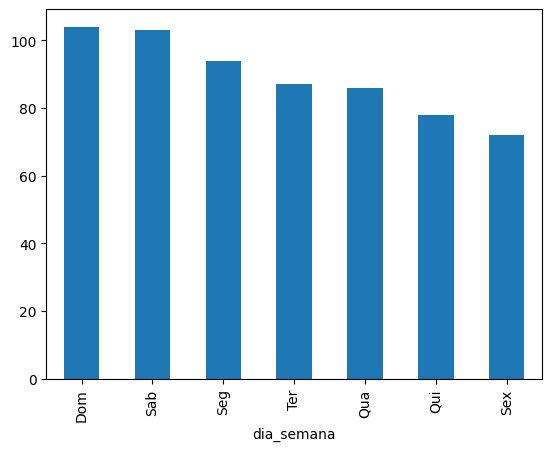

In [113]:
mapa = {
    0: 'Seg',
    1: 'Ter',
    2: 'Qua',
    3: 'Qui',
    4: 'Sex',
    5: 'Sab',
    6: 'Dom',
}
df['dia_semana'].map(mapa).value_counts().plot(kind='bar');

''

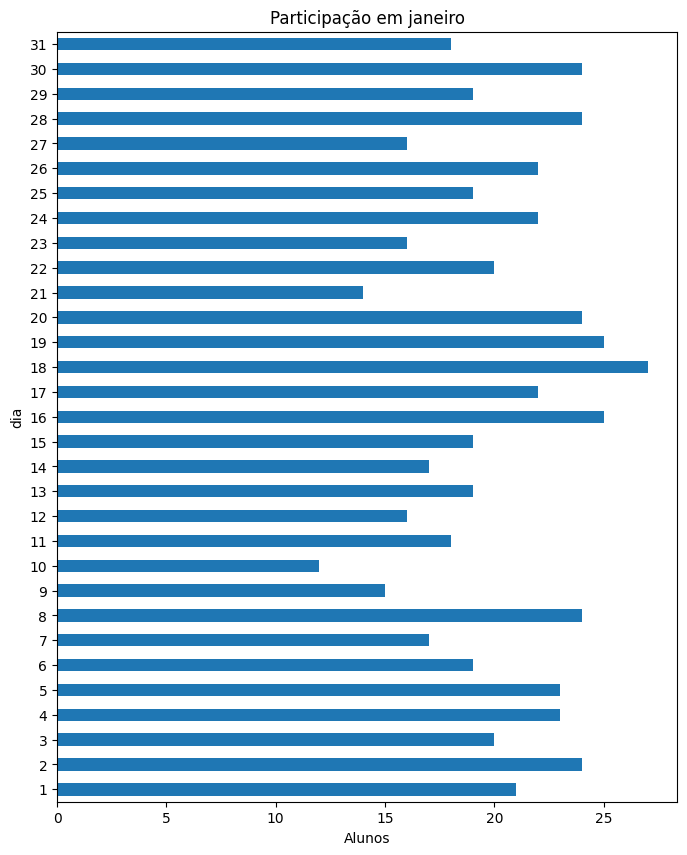

In [117]:
plt.figure(figsize=[8,10])

df['data'].dt.day.value_counts().sort_index(ascending=True).plot(kind='barh')
plt.title('Participação em janeiro')
plt.ylabel('dia')
plt.xlabel('Alunos')
;

Text(0.5, 1.0, 'Média de Notas')

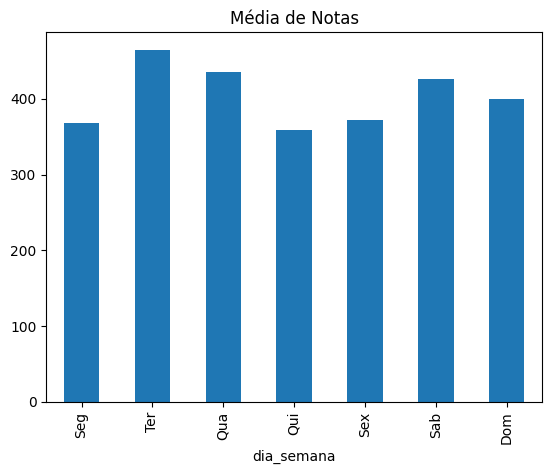

In [122]:
# 3.3.2. Gráfico de pontos das notas por dia da semana.<br>

df.groupby('dia_semana')['nota'].mean().rename(mapa).plot(kind='bar')
plt.title('Média de Notas')

4. Salve um arquivo csv com as notas dos 100 melhores alunos ordenados da melhor nota para a pior nota.